In [26]:
import numpy as np
from functions import *
from numerical_gradient import numerical_gradient_2d
import matplotlib.pylab as plt

In [28]:
class Net_Reg:

    def __init__(self, input_size, h1_size, h2_size, output_size): # h1 : hidden Node 1, h2 : hidden Node 2
        # 가중치 초기화
        self.params = {}        
        self.params['W1'] = np.sqrt(1/2)* np.random.randn(input_size+1, h1_size) 
        self.params['W2'] = np.sqrt(1/2) * np.random.randn(h1_size+1, h2_size)
        self.params['W3'] = np.sqrt(1/2) * np.random.randn(h2_size+1, output_size)


    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        
        b = [1] if x.ndim==1 else np.ones((x.shape[0], 1)) # bias 값 추가
        
        x = np.append(b, x, axis=x.ndim-1)
        a1 = np.dot(x, W1)
        z1 = np.append(b, sigmoid(a1), axis=x.ndim-1) # a1에 대한 활성화 함수 실행
        a2 = np.dot(z1, W2)
        z2 = np.append(b, sigmoid(a2), axis=x.ndim-1) # a2에 대한 활성화 함수 실행
        y = np.dot(z2, W3)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)        
        return mean_squared_error(y, t) # MSE 실행
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t) # E(w)를 람다식으로 표현
        
        grads = {}
        grads['W1'] = numerical_gradient_2d(loss_W, self.params['W1']) # Gradient w1 E(w1)
        grads['W2'] = numerical_gradient_2d(loss_W, self.params['W2']) # Gradient w2 E(w2)
        grads['W3'] = numerical_gradient_2d(loss_W, self.params['W3']) # Gradient w3 E(w3)
        
        return grads  

In [30]:
net = Net_Reg(4, 2, 2, 3) #임의의 예시를 들어놓음

x = np.arange(12).reshape((3, 4))
print("Minibatch: \n", x)
t_num = [0, 2, 1]
t = np.eye(3)[t_num]
print("Target: \n", t)
print("Parameters: \n", net.params)
print("y: \n", net.predict(x))
print("E(W): \n", net.loss(x, t))
print("Gradient: \n", net.numerical_gradient(x,t))

Minibatch: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Target: 
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Parameters: 
 {'W1': array([[-0.12024872,  0.91324233],
       [-0.67240588, -0.08362524],
       [-0.15825238, -0.95312169],
       [-0.32777648, -0.79651804],
       [-1.533602  , -0.09016222]]), 'W2': array([[ 0.45439292, -0.00661658],
       [ 0.81196007, -0.76974799],
       [-0.15536673, -0.76869045]]), 'W3': array([[-1.13184432,  0.63285621,  0.34216125],
       [-0.68483739, -0.96415731,  0.37021785],
       [-0.22078561,  0.16277368, -1.28097893]])}
y: 
 [[-1.6523459   0.12393041 -0.03837947]
 [-1.66077084  0.12421526 -0.06973745]
 [-1.66077543  0.12421499 -0.06975326]]
E(W): 
 7.249868930902253
Gradient: 
 {'W1': array([[ 7.83479970e-04, -2.12280581e-02],
       [-7.25641769e-08, -9.79996972e-05],
       [ 7.83407401e-04, -2.13260578e-02],
       [ 1.56688739e-03, -4.25541159e-02],
       [ 2.35036738e-03, -6.37821742e-02]]), 'W2': array([[1.01340668e+00, 6.80908973e-01],

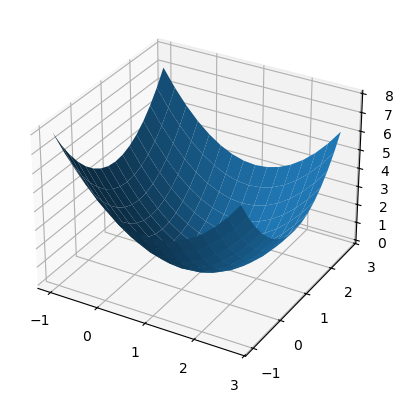

In [32]:
f_unknown = lambda x: np.sum(x**2, axis=0)-2*np.sum(x, axis=0)+2

scope = np.arange(-1, 3, 0.25)
X, Y = np.meshgrid(scope, scope)
Z = f_unknown(np.array([X, Y]))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')             # 3d axes instance
surf= ax.plot_surface(X, Y, Z,          # data values (2D Arryas)
                       rstride=1,                   # row step size
                       cstride=1,                  # column step size
                       linewidth=1,               # wireframe line width
                       antialiased=True)
plt.show()

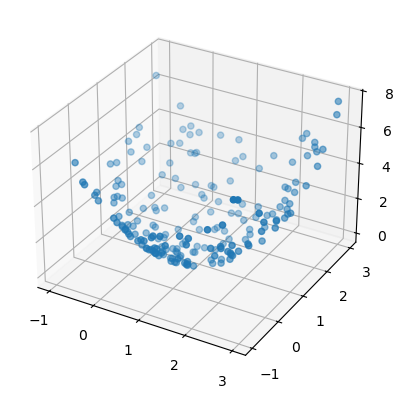

In [34]:
num_samples = 200
x_train = 4*np.random.rand(2, num_samples)-1
t_train = f_unknown(x_train) 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')             # 3d axes instance
surf = ax.scatter(x_train[0], x_train[1], t_train)
plt.show()

In [11]:
net_reg = Net_Reg(2, 10, 10, 1)

iter_n = 10**4
bch_size = 10
x_train = np.transpose(x_train)
eta = 0.001

for i in range(iter_n):
    idx = np.random.choice(num_samples, bch_size)
    grds = net_reg.numerical_gradient(x_train[idx], t_train[idx])
    for key in ('W1', 'W2', 'W3'):
        net_reg.params[key]-= eta*grds[key]
    if i%1000==0:
        print("%5d/%d completed, MSE: %7.2f"%(i, iter_n, net_reg.loss(x_train, t_train)) )

    0/10000 completed, MSE: 131668.68
 1000/10000 completed, MSE: 57476.53
 2000/10000 completed, MSE: 58295.89
 3000/10000 completed, MSE: 58907.51
 4000/10000 completed, MSE: 57857.88
 5000/10000 completed, MSE: 59070.90
 6000/10000 completed, MSE: 57780.73
 7000/10000 completed, MSE: 58643.21
 8000/10000 completed, MSE: 58042.09
 9000/10000 completed, MSE: 58706.25


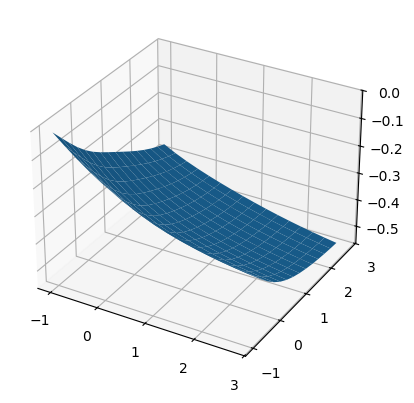

In [36]:
scope = np.arange(-1, 3, 0.25)
X, Y = np.meshgrid(scope, scope)
grid = np.transpose(np.array([X.flatten(), Y.flatten()]))
Z = net_reg.predict(grid)
Z = Z.reshape((16,16))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')             # 3d axes instance
surf= ax.plot_surface(X, Y, Z,          # data values (2D Arryas)
                       rstride=1,                   # row step size
                       cstride=1,                  # column step size
                       linewidth=1,               # wireframe line width
                       antialiased=True)
plt.show()

In [38]:
np.random.choice(10,5) # 중복 허용

array([9, 0, 6, 5, 9])

In [40]:
net_reg = Net_Reg(2, 10, 10, 1)
x_train = np.transpose(x_train)

In [ ]:
eta = 0.001
epoch = 500 # epoch : 내가 가지고 있는 데이터를 죄다 다 써먹으면 epoch이 한번 돌았다고 한다
bch_size = 10 
iter_per_epoch = int(num_samples/bch_size) # 한 iteration당 몇번 도는건지

for j in range(epoch):
    bch_idx = np.random.permutation(num_samples).reshape(iter_per_epoch, bch_size) 
    
    for idx in bch_idx:
        grds = net_reg.numerical_gradient(x_train[idx], t_train[idx])
        for key in ('W1', 'W2', 'W3'):
            net_reg.params[key] -= eta*grds[key]

    if j%20==0:
        print("[epoch %3d/%d],  MSE: %7.2f"%(j, epoch, net_reg.loss(x_train, t_train)))

[epoch   0/500],  MSE: 56285.29
[epoch  20/500],  MSE: 53834.83
[epoch  40/500],  MSE: 54008.60
[epoch  60/500],  MSE: 55358.95
[epoch  80/500],  MSE: 54056.34
[epoch 100/500],  MSE: 54284.38
[epoch 120/500],  MSE: 54293.50
[epoch 140/500],  MSE: 54022.67
[epoch 160/500],  MSE: 54008.15
[epoch 180/500],  MSE: 53798.26
[epoch 200/500],  MSE: 53965.64
[epoch 220/500],  MSE: 56600.43
[epoch 240/500],  MSE: 54069.55
[epoch 260/500],  MSE: 53880.06
[epoch 280/500],  MSE: 53832.01


In [ ]:
scope = np.arange(-1, 3, 0.25)
X, Y = np.meshgrid(scope, scope)
grid = np.transpose(np.array([X.flatten(), Y.flatten()]))
Z = net_reg.predict(grid)
Z = Z.reshape((16,16))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')             # 3d axes instance
surf= ax.plot_surface(X, Y, Z,          # data values (2D Arryas)
                       rstride=1,                   # row step size
                       cstride=1,                  # column step size
                       linewidth=1,               # wireframe line width
                       antialiased=True)
plt.show()

In [22]:
np.random.permutation(200).reshape(20,10) # 0~199의 수를 랜덤하게 섞은것

array([[ 92,  31, 129,  14, 157,  85,  56, 165,  33,  70],
       [ 76,  87,  53, 198, 164, 180, 189, 162, 134,  65],
       [ 55, 107, 154,  43,  27,  71, 184, 125, 103,  86],
       [ 60,  49, 187,  78, 173,  99, 155,  32, 135, 152],
       [ 79, 192, 110,  20,  42, 149, 148, 145, 128, 137],
       [111, 177,  69,  13,  40, 124,  17, 172, 112,  98],
       [ 21,  58, 109, 191, 171, 113, 159, 102,  91, 161],
       [153, 186,   1,  34, 151,  18,  97, 133, 197, 183],
       [  0, 101,  63,  22,  39,   6,  81,  19,  88,  84],
       [196,  35, 105, 193,  89,  80,  59, 138,  52,  46],
       [  5, 167,  77,  64,  48, 117,  38, 174,  41,  16],
       [106, 139, 199, 143, 108, 188, 185, 122, 126,   3],
       [179, 100,  24, 190, 127, 194,  44,  37,  36, 170],
       [121,  95,   8, 169,  45,  50, 146,  54, 168,  11],
       [ 67, 144,  57, 147, 163,  25,  82,  29,  15,  90],
       [118, 178,   9, 116,  28,  12, 131,  61, 156,  75],
       [175, 158, 182,  83, 166, 119, 132, 114, 120, 150